# Goal is building windows of data ( to feed to CNN)

1. Data Import , Cleaning and Visualizing (for a report)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import re

In [2]:
df = pd.read_csv("results/scorpan.csv")
df

id  id_memoire  id_ech   Wilaya      Region                       X  \
0       1           1       1    Alger  El-Harrach                   3 107   
1       2           1       1    Alger  El-Harrach                   3 107   
2       3           1       1    Alger  El-Harrach                   3 107   
3       4           2       2    Alger  El-Harrach                 313 333   
4       5           2       2    Alger  El-Harrach                 313 333   
..    ...         ...     ...      ...         ...                     ...   
716  1916          98     638  Tlemcen     Hennaya  -1 521 323 465 419 020   
717  1919          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   
718  1920          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   
719  1921          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   
720  1922          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   

                         Y  Longitude        latitude altitude  ...  \
0                   36 684  3.107 Est  36.684Â° Nord        22  ...   
1                   36 684  3.107 Est  36.684Â° Nord        22  ...   
2                   36 684  3.107 Est  36.684Â° Nord        22  ...   
3              360 716 666  3Â°E08â€™         36Â°N43       24  ...   
4              360 716 666  3Â°E08â€™         36Â°N43       24  ...   
..                     ...        ...             ...      ...  ...   
716  3 502 563 533 189 600        NaN             NaN      NaN  ...   
717  3 443 635 942 679 530        NaN             NaN      NaN  ...   
718  3 443 635 942 679 530        NaN             NaN      NaN  ...   
719  3 443 635 942 679 530        NaN             NaN      NaN  ...   
720  3 443 635 942 679 530        NaN             NaN      NaN  ...   

     wc2_1_30s_tavg_10_Band_1  wc2_1_30s_tavg_09_Band_1  \
0               1 979 999 924             2 379 999 924   
1               1 979 999 924             2 379 999 924   
2               1 979 999 924             2 379 999 924   
3               1 560 000 038             2 070 000 076   
4               1 560 000 038             2 070 000 076   
..                        ...                       ...   
716             2 010 000 038             2 429 999 924   
717             1 510 000 038                      20,5   
718             1 510 000 038                      20,5   
719             1 510 000 038                      20,5   
720             1 510 000 038                      20,5   

    wc2_1_30s_tavg_08_Band_1 wc2_1_30s_tavg_07_Band_1  \
0              2 610 000 038                       25   
1              2 610 000 038                       25   
2              2 610 000 038                       25   
3                       24,5            2 439 999 962   
4                       24,5            2 439 999 962   
..                       ...                      ...   
716                     27,5                       27   
717            2 520 000 076            2 539 999 962   
718            2 520 000 076            2 539 999 962   
719            2 520 000 076            2 539 999 962   
720            2 520 000 076            2 539 999 962   

    wc2_1_30s_tavg_06_Band_1 wc2_1_30s_tavg_05_Band_1  \
0              2 210 000 038                     18,5   
1              2 210 000 038                     18,5   
2              2 210 000 038                     18,5   
3              2 020 000 076            1 589 999 962   
4              2 020 000 076            1 589 999 962   
..                       ...                      ...   
716            2 360 000 038            1 979 999 924   
717            2 120 000 076                     16,5   
718            2 120 000 076                     16,5   
719            2 120 000 076                     16,5   
720            2 120 000 076                     16,5   

    wc2_1_30s_tavg_04_Band_1 wc2_1_30s_tavg_03_Band_1  \
0              1 530 000 019            1 339 999 962   
1              1 530 000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Columns: 124 entries, id to wc2_1_30s_tavg_01_Band_1
dtypes: float64(1), int64(39), object(84)
memory usage: 698.6+ KB


In [4]:
df.iloc[100]

id                                    407
id_memoire                             29
id_ech                                139
Wilaya                              Batna
Region                             Fesdis
                                ...      
wc2_1_30s_tavg_05_Band_1    1 569 999 981
wc2_1_30s_tavg_04_Band_1    1 180 000 019
wc2_1_30s_tavg_03_Band_1    8 600 000 381
wc2_1_30s_tavg_02_Band_1    6 199 999 809
wc2_1_30s_tavg_01_Band_1    5 400 000 095
Name: 100, Length: 124, dtype: object

In [5]:
for i in df.columns[3:23]:
    print(df[i].value_counts())
    print("\n\n")

Wilaya
Mitija           160
Skikda            80
El taref          71
Msila             58
Jijel             58
Biskra            50
Batna             42
Djelfa            40
Annaba            39
Relizane          39
Setif             26
Alger             23
Tlemcen           10
Ouled Djellal     10
Boumerdes          6
Medea              4
Chelef             3
Tiaret             2
Name: count, dtype: int64



Region
El Hadaiek                           80
Fesdis                               40
Ben Amar                             27
Bouira Lahdab                        26
Hodna                                24
El Kenner                            24
El-Gouriat- OkrÃ©ra                  23
Mezloug                              20
Le lac Bleu                          18
El Kala                              18
bas-chelif                           18
Taza                                 16
Ain Oussara                          14
Beni-Belaid                          12
Oued Mafragh       

longitude format enhancing

In [6]:
for i in df["Longitude"]:
    print(i)

3.107 Est
3.107 Est
3.107 Est
3Â°E08â€™
3Â°E08â€™
3Â°09'00"E
3Â°09'00"E
 2Â°52'49"E
 2Â°52'49"E
3Â°10'42.1"E
3Â°10'42.1"E
3Â°9.573' E
3Â°9.573' E
3Â°9.573' E
3Â°9.573' E
3Â°06'05"E
3Â°06'05"E
6Â° 16â€™ 26.18â€™â€™ E
6Â° 16â€™ 26.18â€™â€™ E
6Â° 16â€™ 26.18â€™â€™ E
6Â° 16â€™ 26.18â€™â€™ E
6Â° 16â€™ 26.18â€™â€™ E
6Â° 18â€™ 22. 9â€™â€™ E
6Â° 18â€™ 22. 9â€™â€™ E
6Â° 18â€™ 22. 9â€™â€™ E
6Â° 18â€™ 22. 9â€™â€™ E
6Â° 18â€™ 22. 9â€™â€™ E
5 Â° 6â€™ 05.28â€™â€™ E
5 Â° 6â€™ 05.28â€™â€™ E
5 Â° 6â€™ 05.28â€™â€™ E
5 Â° 6â€™ 05.28â€™â€™ E
5 Â° 6â€™ 05.28â€™â€™ E
5Â° 08â€™ 16.05â€™â€™ E
5Â° 08â€™ 16.05â€™â€™ E
5Â° 08â€™ 16.05â€™â€™ E
5Â° 08â€™ 16.05â€™â€™ E
5Â° 08â€™ 16.05â€™â€™ E
 5Â° 22â€™ 11.68â€™â€™ E
 5Â° 22â€™ 11.68â€™â€™ E
 5Â° 22â€™ 11.68â€™â€™ E
 5Â° 22â€™ 11.68â€™â€™ E
 5Â° 22â€™ 11.68â€™â€™ E
5Â° 23â€™ 23.53â€™â€™ E
5Â° 23â€™ 23.53â€™â€™ E
5Â° 23â€™ 23.53â€™â€™ E
5Â° 23â€™ 23.53â€™â€™ E
5Â° 23â€™ 23.53â€™â€™ E
5Â° 41â€™ 06.34â€™â€™ E
5Â° 41â€™ 06.34â€™â€™ E
5Â° 41â€™ 06.34â€™â€™ E
5Â° 41â€™ 0

In [7]:
def clean_longitude(value , atr):
    val1=0 
    val2=0
    val3=0
    if isinstance(value , str):
        if atr =="Longitude":
            value = value.replace("Â°" , "°").replace("â€™â€™" , '"').replace("â€˜â€˜" ,'"').replace("''" , '"').replace("â€™" , "'").replace("â€˜" ,"'").replace("Est" , "°").replace(" ", "").replace("E", "").replace("Ëš","°")
            print(value)
        elif atr == "latitude":
            value = value.replace("Â°" , "°").replace("â€™â€™" , '"').replace("â€˜â€˜" ,'"').replace("''" , '"').replace("â€™" , "'").replace("â€˜" ,"'").replace("Nord" , "").replace(" ", "").replace("N", "").replace("Ëš","°")
            print(value)

        val1_str = value.split("°")[0]
        val1 = float(val1_str)
        result = val1 

        try : 
            new_val = value.replace(f"{val1_str}°" , "")
            val2_str = new_val.split("'")[0]
            val2 = float(val2_str)
            result +=  val2/60
            try :
                val3 = float(value.replace(f"{val1_str}°{val2_str}'" , "").split('"')[0])
                result +=  val3/3600
            except Exception as e:
                pass
        except Exception as e :
            pass
        print(f"val1-->{val1}   val2-->{val2}   val3-->{val3}")
        print(result)
        print("=======================================")
        return result

df["Longitude"]=df["Longitude"].apply(lambda x : clean_longitude(x , "Longitude"))
df["Longitude"]

3.107°
val1-->3.107   val2-->0   val3-->0
3.107
3.107°
val1-->3.107   val2-->0   val3-->0
3.107
3.107°
val1-->3.107   val2-->0   val3-->0
3.107
3°08'
val1-->3.0   val2-->8.0   val3-->0
3.1333333333333333
3°08'
val1-->3.0   val2-->8.0   val3-->0
3.1333333333333333
3°09'00"
val1-->3.0   val2-->9.0   val3-->0.0
3.15
3°09'00"
val1-->3.0   val2-->9.0   val3-->0.0
3.15
2°52'49"
val1-->2.0   val2-->52.0   val3-->49.0
2.8802777777777777
2°52'49"
val1-->2.0   val2-->52.0   val3-->49.0
2.8802777777777777
3°10'42.1"
val1-->3.0   val2-->10.0   val3-->42.1
3.1783611111111107
3°10'42.1"
val1-->3.0   val2-->10.0   val3-->42.1
3.1783611111111107
3°9.573'
val1-->3.0   val2-->9.573   val3-->0
3.15955
3°9.573'
val1-->3.0   val2-->9.573   val3-->0
3.15955
3°9.573'
val1-->3.0   val2-->9.573   val3-->0
3.15955
3°9.573'
val1-->3.0   val2-->9.573   val3-->0
3.15955
3°06'05"
val1-->3.0   val2-->6.0   val3-->5.0
3.101388888888889
3°06'05"
val1-->3.0   val2-->6.0   val3-->5.0
3.101388888888889
6°16'26.18"
val1--

0      3.107000
1      3.107000
2      3.107000
3      3.133333
4      3.133333
         ...   
716         NaN
717         NaN
718         NaN
719         NaN
720         NaN
Name: Longitude, Length: 721, dtype: float64

In [8]:
for i in df["latitude"]:
    print(i)

36.684Â° Nord 
36.684Â° Nord 
36.684Â° Nord 
36Â°N43
36Â°N43
36Â°43'27"N
36Â°43'27"N
36Â°45'27"N
36Â°45'27"N
36Â°42'14.7"N
36Â°42'14.7"N
36Â°42.319 'N
36Â°42.319 'N
36Â°42.319 'N
36Â°42.319 'N
36Â°41'02"N
36Â°41'02"N
34Â° 43â€™ 37â€™â€™ N
34Â° 43â€™ 37â€™â€™ N
34Â° 43â€™ 37â€™â€™ N
34Â° 43â€™ 37â€™â€™ N
34Â° 43â€™ 37â€™â€™ N
 34Â° 43â€™ 6.04â€™â€™ N
 34Â° 43â€™ 6.04â€™â€™ N
 34Â° 43â€™ 6.04â€™â€™ N
 34Â° 43â€™ 6.04â€™â€™ N
 34Â° 43â€™ 6.04â€™â€™ N
34 Â° 38â€™ 06.29â€™â€™ N
34 Â° 38â€™ 06.29â€™â€™ N
34 Â° 38â€™ 06.29â€™â€™ N
34 Â° 38â€™ 06.29â€™â€™ N
34 Â° 38â€™ 06.29â€™â€™ N
34Â° 38â€™ 16.88â€™â€™ N
34Â° 38â€™ 16.88â€™â€™ N
34Â° 38â€™ 16.88â€™â€™ N
34Â° 38â€™ 16.88â€™â€™ N
34Â° 38â€™ 16.88â€™â€™ N
34Â° 43â€™ 0.51â€™â€™ N
34Â° 43â€™ 0.51â€™â€™ N
34Â° 43â€™ 0.51â€™â€™ N
34Â° 43â€™ 0.51â€™â€™ N
34Â° 43â€™ 0.51â€™â€™ N
34Â° 43â€™ 47.14â€™â€™ N
34Â° 43â€™ 47.14â€™â€™ N
34Â° 43â€™ 47.14â€™â€™ N
34Â° 43â€™ 47.14â€™â€™ N
34Â° 43â€™ 47.14â€™â€™ N
34Â° 48â€™ 34.20â€™ â€™N
34Â° 48â€™ 34.20â€™ â€™

In [9]:
df["latitude"]=df["latitude"].apply(lambda x : clean_longitude(x , "latitude"))
df["latitude"]

36.684°
val1-->36.684   val2-->0   val3-->0
36.684
36.684°
val1-->36.684   val2-->0   val3-->0
36.684
36.684°
val1-->36.684   val2-->0   val3-->0
36.684
36°43
val1-->36.0   val2-->43.0   val3-->0
36.71666666666667
36°43
val1-->36.0   val2-->43.0   val3-->0
36.71666666666667
36°43'27"
val1-->36.0   val2-->43.0   val3-->27.0
36.72416666666667
36°43'27"
val1-->36.0   val2-->43.0   val3-->27.0
36.72416666666667
36°45'27"
val1-->36.0   val2-->45.0   val3-->27.0
36.7575
36°45'27"
val1-->36.0   val2-->45.0   val3-->27.0
36.7575
36°42'14.7"
val1-->36.0   val2-->42.0   val3-->14.7
36.70408333333334
36°42'14.7"
val1-->36.0   val2-->42.0   val3-->14.7
36.70408333333334
36°42.319'
val1-->36.0   val2-->42.319   val3-->0
36.70531666666667
36°42.319'
val1-->36.0   val2-->42.319   val3-->0
36.70531666666667
36°42.319'
val1-->36.0   val2-->42.319   val3-->0
36.70531666666667
36°42.319'
val1-->36.0   val2-->42.319   val3-->0
36.70531666666667
36°41'02"
val1-->36.0   val2-->41.0   val3-->2.0
36.683888888

0      36.684000
1      36.684000
2      36.684000
3      36.716667
4      36.716667
         ...    
716          NaN
717          NaN
718          NaN
719          NaN
720          NaN
Name: latitude, Length: 721, dtype: float64

In [10]:
df

id  id_memoire  id_ech   Wilaya      Region                       X  \
0       1           1       1    Alger  El-Harrach                   3 107   
1       2           1       1    Alger  El-Harrach                   3 107   
2       3           1       1    Alger  El-Harrach                   3 107   
3       4           2       2    Alger  El-Harrach                 313 333   
4       5           2       2    Alger  El-Harrach                 313 333   
..    ...         ...     ...      ...         ...                     ...   
716  1916          98     638  Tlemcen     Hennaya  -1 521 323 465 419 020   
717  1919          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   
718  1920          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   
719  1921          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   
720  1922          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   

                         Y  Longitude   latitude altitude  ...  \
0                   36 684   3.107000  36.684000       22  ...   
1                   36 684   3.107000  36.684000       22  ...   
2                   36 684   3.107000  36.684000       22  ...   
3              360 716 666   3.133333  36.716667       24  ...   
4              360 716 666   3.133333  36.716667       24  ...   
..                     ...        ...        ...      ...  ...   
716  3 502 563 533 189 600        NaN        NaN      NaN  ...   
717  3 443 635 942 679 530        NaN        NaN      NaN  ...   
718  3 443 635 942 679 530        NaN        NaN      NaN  ...   
719  3 443 635 942 679 530        NaN        NaN      NaN  ...   
720  3 443 635 942 679 530        NaN        NaN      NaN  ...   

     wc2_1_30s_tavg_10_Band_1  wc2_1_30s_tavg_09_Band_1  \
0               1 979 999 924             2 379 999 924   
1               1 979 999 924             2 379 999 924   
2               1 979 999 924             2 379 999 924   
3               1 560 000 038             2 070 000 076   
4               1 560 000 038             2 070 000 076   
..                        ...                       ...   
716             2 010 000 038             2 429 999 924   
717             1 510 000 038                      20,5   
718             1 510 000 038                      20,5   
719             1 510 000 038                      20,5   
720             1 510 000 038                      20,5   

    wc2_1_30s_tavg_08_Band_1 wc2_1_30s_tavg_07_Band_1  \
0              2 610 000 038                       25   
1              2 610 000 038                       25   
2              2 610 000 038                       25   
3                       24,5            2 439 999 962   
4                       24,5            2 439 999 962   
..                       ...                      ...   
716                     27,5                       27   
717            2 520 000 076            2 539 999 962   
718            2 520 000 076            2 539 999 962   
719            2 520 000 076            2 539 999 962   
720            2 520 000 076            2 539 999 962   

    wc2_1_30s_tavg_06_Band_1 wc2_1_30s_tavg_05_Band_1  \
0              2 210 000 038                     18,5   
1              2 210 000 038                     18,5   
2              2 210 000 038                     18,5   
3              2 020 000 076            1 589 999 962   
4              2 020 000 076            1 589 999 962   
..                       ...                      ...   
716            2 360 000 038            1 979 999 924   
717            2 120 000 076                     16,5   
718            2 120 000 076                     16,5   
719            2 120 000 076                     16,5   
720            2 120 000 076                     16,5   

    wc2_1_30s_tavg_04_Band_1 wc2_1_30s_tavg_03_Band_1  \
0              1 530 000 019            1 339 999 962   
1              1 530 000 019            1 339 999 962   
2              1 530 000 01

In [11]:
df.iloc[500]

id                                   1670
id_memoire                             14
id_ech                                576
Wilaya                             Annaba
Region                           Ben Amar
                                ...      
wc2_1_30s_tavg_05_Band_1    1 889 999 962
wc2_1_30s_tavg_04_Band_1    1 530 000 019
wc2_1_30s_tavg_03_Band_1    1 310 000 038
wc2_1_30s_tavg_02_Band_1    1 180 000 019
wc2_1_30s_tavg_01_Band_1    1 139 999 962
Name: 500, Length: 124, dtype: object

In [12]:
for i in df["altitude"]:
    print(i)

22
22
22
24
24
42
42
44
44
12
12
44
44
44
44
17
17
31
31
31
31
31
31
31
31
31
31
168
168
168
168
168
168
168
168
168
168
168
168
168
168
168
153
153
153
153
153
97
97
97
97
97
97
97
97
97
97
44
44
44
44
44
44
44
44
44
44
198
198
198
198
198
198
198
198
198
198
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
5
5
177
102
177
841
841
841
841
841
841
836
836
836
836
836
836
778
778
778
778
777
777
777
777
777
777
775
775
775
775
711
711
711
711
711
711
706
706
706
706
706
706
704
704
381,9
381,9
381,9
381,9
381,9
381,9
397,6
397,6
397,6
397,6
397,6
397,6
397,3
397,3
397,3
397,3
397,3
397,3
405,6
405,6
405,6
405,6
405,6
405,6
3
3
3
3
3
3
3
3
3
3
3
3
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

In [13]:
def clean_altitude_depth(value):
    value = str(value).replace(",",".")
    value = float(value)
    return value

df["altitude"]=df["altitude"].apply(clean_altitude_depth)
df["altitude"]

0      22.0
1      22.0
2      22.0
3      24.0
4      24.0
       ... 
716     NaN
717     NaN
718     NaN
719     NaN
720     NaN
Name: altitude, Length: 721, dtype: float64

In [14]:
for i in df["average profondeur"]:
    print(i)

22,5
45
80
22,5
45
22,5
45
10
22,5
22,5
45
22,5
45
80
150
22,5
45
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
80
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
22,5
22,5
10
22,5
45
80
45
80
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
45
80
22,5
45
22,5
45
22,5
45
10
22,5
22,5
45
10
22,5
10
22,5
10
22,5
10
22,5
22,5
45
2,5
10
22,5
45
80
150
2,5
10
22,5
45
80
150
2,5
10
22,5
45
80
150
2,5
10
22,5
45
80
150
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
22,5
45
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,5
10
2,

In [15]:
df["average profondeur"]=df["average profondeur"].apply(clean_altitude_depth)
df["average profondeur"]

0       22.5
1       45.0
2       80.0
3       22.5
4       45.0
       ...  
716     80.0
717     22.5
718     45.0
719     80.0
720    150.0
Name: average profondeur, Length: 721, dtype: float64

In [16]:
for i in df["USDA Soil Taxonomy"]:
    print(i)

nan
nan
nan
CL
CL
nan
nan
nan
nan
nan
nan
CL
CL
SCL
SCL
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
SL
SL
L
L
L
SL
SL
SAL
SAL
SL
SL
SL
SL
SL
SL
L
L
L
L
AL
AL
SL
SL
SL
SL
LS
LS
SL
SL
SL
SL
SAL
SAL
SL
SL
SL
SL
LS
LS
LS
LS
SL
SL
SL
SL
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
S
A
A
A
A
A
A
AS
AS
AS
AS
AS
AS
LA
LA
LA
LA
LA
LA
LS
LS
LS
LS
LS
LS
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
SL
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
na

In [17]:
def clean_numeric_data(value):
    print(value)
    value_str = str(value).replace(",", ".")
    first_occurrence_index = value_str.find("\u202f")
    if first_occurrence_index != -1:
        value_str = (value_str[:first_occurrence_index] + '.' + value_str[first_occurrence_index + 1:])
        value_str = value_str.replace("\u202f", "")
    
    print(value_str)
    return float(value_str)

In [18]:
for i in df.columns[14:23]:
    print(f"column {i}")
    df[i]=df[i].apply(clean_numeric_data)
df.describe()

column pH
7,87
7.87
7 774
7.774
7 799
7.799
7,95
7.95
8 096
8.096
8,5
8.5
8,5
8.5
8,59
8.59
8,59
8.59
7,83
7.83
7,83
7.83
7,2
7.2
7,2
7.2
7,8
7.8
7,8
7.8
8,5
8.5
8,5
8.5
7 021
7.021
7,06
7.06
7 182
7.182
7 457
7.457
7 619
7.619
7 867
7.867
7 878
7.878
7 893
7.893
7,86
7.86
7 828
7.828
6 935
6.935
6 997
6.997
7 123
7.123
7 143
7.143
7 105
7.105
7 821
7.821
7 652
7.652
7 304
7.304
7 207
7.207
7,28
7.28
7 718
7.718
7 684
7.684
7 603
7.603
7,52
7.52
7 489
7.489
7 912
7.912
7 862
7.862
7,73
7.73
7 519
7.519
7 411
7.411
7 797
7.797
7,81
7.81
7 816
7.816
7 685
7.685
7 582
7.582
7 892
7.892
7 926
7.926
8 006
8.006
8 097
8.097
8 133
8.133
7 092
7.092
7 292
7.292
7 713
7.713
7 892
7.892
7 852
7.852
7 822
7.822
7 815
7.815
7 801
7.801
7 798
7.798
7 801
7.801
7 078
7.078
7 128
7.128
7,22
7.22
7 189
7.189
7 126
7.126
7 579
7.579
7 459
7.459
7 205
7.205
7 077
7.077
7 085
7.085
7,69
7.69
7,69
7.69
7,69
7.69
7,69
7.69
7 876
7.876
7 895
7.895
7 968
7.968
8 027
8.027
7 558
7.558
7 598
7.598
7 758
7.758


20.463
20 926
20.926
22 038
22.038
19 183
19.183
18 078
18.078
14 524
14.524
17 504
17.504
18 635
18.635
18 456
18.456
17 301
17.301
17 884
17.884
18,03
18.03
18 601
18.601
19 695
19.695
19 724
19.724
22 985
22.985
18 379
18.379
18 524
18.524
19 155
19.155
20 781
20.781
20,7
20.7
16 848
16.848
18 087
18.087
21 575
21.575
18 037
18.037
17 113
17.113
12 988
12.988
17 825
17.825
17 161
17.161
16 056
16.056
13 637
13.637
16 499
16.499
8 128
8.128
21 248
21.248
20 935
20.935
19 795
19.795
18 618
18.618
17 137
17.137
22 058
22.058
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
228
228
228
228
228
228
202
202
202
202
202
202
569
569
569
569
569
569
338
338
338
338
338
338
545
545
545
545
545
545
252
252
252
252
252
252
162
162
162
162
162
162
242
242
242
242
242
242
274
274
274
274
274
274
228 505
228.505
145 983
145.983
91 726
91.726
145 259
145.259
266 342
266.342
345 953
345.953
175 764
175.764
214 325
214.325
239 679
239.679

id  id_memoire      id_ech   Longitude    latitude  \
count   721.000000  721.000000  721.000000  711.000000  711.000000   
mean   1032.420250   49.238558  359.565881    4.851758   36.207702   
std     600.889102   25.838843  201.558749    2.231252    0.704983   
min       1.000000    1.000000    1.000000    0.492000   34.635081   
25%     523.000000   21.000000  189.000000    2.611669   35.610464   
50%     907.000000   57.000000  335.000000    5.307222   36.509564   
75%    1716.000000   63.000000  590.000000    6.883333   36.807500   
max    1922.000000   98.000000  640.000000    8.341389   36.904722   

         altitude          UD          LD  average profondeur          pH  \
count   402.00000  721.000000  721.000000          721.000000  705.000000   
mean    238.20000   18.606103   38.217753           28.411928    7.461732   
std     328.24141   25.245300   46.338651           35.742261    1.063685   
min       3.00000    0.000000    5.000000            2.500000    4.102000   
25%      14.00000    0.000000    5.000000            2.500000    7.021000   
50%      35.00000    5.000000   15.000000           10.000000    7.815000   
75%     397.60000   30.000000   60.000000           45.000000    8.200000   
max    1100.00000  100.000000  200.000000          150.000000    9.150000   

       ...  wc2_1_30s_srad_10_Band_1  wc2_1_30s_srad_09_Band_1  \
count  ...                721.000000                721.000000   
mean   ...              13813.570042              19034.812760   
std    ...                604.964894                741.489106   
min    ...              13086.000000              18059.000000   
25%    ...              13368.000000              18368.000000   
50%    ...              13428.000000              18875.000000   
75%    ...              14256.000000              19473.000000   
max    ...              15231.000000              20867.000000   

       wc2_1_30s_srad_08_Band_1  wc2_1_30s_srad_07_Band_1  \
count                721.000000                721.000000   
mean               23737.511789              26317.142857   
std                  655.042013                779.546829   
min                22529.000000              24747.000000   
25%                23134.000000              25582.000000   
50%                23911.000000              26490.000000   
75%                24287.000000              26989.000000   
max                24937.000000              27516.000000   

       wc2_1_30s_srad_06_Band_1  wc2_1_30s_srad_05_Band_1  \
count                721.000000                721.000000   
mean               25012.471567              23663.932039   
std                  410.945603                667.290589   
min                24145.000000              22379.000000   
25%                24729.000000              23203.000000   
50%                25015.000000              23561.000000   
75%                25261.000000              24015.000000   
max                25935.000000              25126.000000   

       wc2_1_30s_srad_04_Band_1  wc2_1_30s_srad_03_Band_1  \
count                721.000000                721.000000   
mean               19733.320388              16101.829404   
std                  766.349308                787.991189   
min                18844.000000              15277.000000   
25%                19084.000000              15555.000000   
50%                19441.000000              15637.000000   
75%                20156.000000              16788.000000   
max                21736.000000              17993.000000   

       wc2_1_30s_srad_02_Band_1  wc2_1_30s_srad_01_Band_1  
count                721.000000                721.000000  
mean               12000.907074               8867.153953  
std                  835.434261                655.271765  
min                11125.000000               8209.000000  
25%                11216.000000               8299.000000  
50%                11746.000000               8622.000000  
75%                12533.0

In [19]:
for i in df.columns[23:]:
    print(i)

AREA
PERIMETER
GEO2_7G_
GEO2_7G_ID
GLG
SNUM
FAOSOIL
DOMSOI
PHASE1
SQKM
SRTMGL1_band1
landcover
Band3
Band4
Band5
Band7
NDVI
wc2_1_30s_wind_12_Band_1
wc2_1_30s_wind_11_Band_1
wc2_1_30s_wind_10_Band_1
wc2_1_30s_wind_09_Band_1
wc2_1_30s_wind_08_Band_1
wc2_1_30s_wind_07_Band_1
wc2_1_30s_wind_06_Band_1
wc2_1_30s_wind_05_Band_1
wc2_1_30s_wind_04_Band_1
wc2_1_30s_wind_03_Band_1
wc2_1_30s_wind_02_Band_1
wc2_1_30s_wind_01_Band_1
wc2_1_30s_vapr_12_Band_1
wc2_1_30s_vapr_11_Band_1
wc2_1_30s_vapr_10_Band_1
wc2_1_30s_vapr_09_Band_1
wc2_1_30s_vapr_08_Band_1
wc2_1_30s_vapr_07_Band_1
wc2_1_30s_vapr_06_Band_1
wc2_1_30s_vapr_05_Band_1
wc2_1_30s_vapr_04_Band_1
wc2_1_30s_vapr_03_Band_1
wc2_1_30s_vapr_02_Band_1
wc2_1_30s_vapr_01_Band_1
wc2_1_30s_tmin_12_Band_1
wc2_1_30s_tmin_11_Band_1
wc2_1_30s_tmin_10_Band_1
wc2_1_30s_tmin_09_Band_1
wc2_1_30s_tmin_08_Band_1
wc2_1_30s_tmin_07_Band_1
wc2_1_30s_tmin_06_Band_1
wc2_1_30s_tmin_05_Band_1
wc2_1_30s_tmin_04_Band_1
wc2_1_30s_tmin_03_Band_1
wc2_1_30s_tmin_02_Band_1
w

In [20]:
df.describe()

id  id_memoire      id_ech   Longitude    latitude  \
count   721.000000  721.000000  721.000000  711.000000  711.000000   
mean   1032.420250   49.238558  359.565881    4.851758   36.207702   
std     600.889102   25.838843  201.558749    2.231252    0.704983   
min       1.000000    1.000000    1.000000    0.492000   34.635081   
25%     523.000000   21.000000  189.000000    2.611669   35.610464   
50%     907.000000   57.000000  335.000000    5.307222   36.509564   
75%    1716.000000   63.000000  590.000000    6.883333   36.807500   
max    1922.000000   98.000000  640.000000    8.341389   36.904722   

         altitude          UD          LD  average profondeur          pH  \
count   402.00000  721.000000  721.000000          721.000000  705.000000   
mean    238.20000   18.606103   38.217753           28.411928    7.461732   
std     328.24141   25.245300   46.338651           35.742261    1.063685   
min       3.00000    0.000000    5.000000            2.500000    4.102000   
25%      14.00000    0.000000    5.000000            2.500000    7.021000   
50%      35.00000    5.000000   15.000000           10.000000    7.815000   
75%     397.60000   30.000000   60.000000           45.000000    8.200000   
max    1100.00000  100.000000  200.000000          150.000000    9.150000   

       ...  wc2_1_30s_srad_10_Band_1  wc2_1_30s_srad_09_Band_1  \
count  ...                721.000000                721.000000   
mean   ...              13813.570042              19034.812760   
std    ...                604.964894                741.489106   
min    ...              13086.000000              18059.000000   
25%    ...              13368.000000              18368.000000   
50%    ...              13428.000000              18875.000000   
75%    ...              14256.000000              19473.000000   
max    ...              15231.000000              20867.000000   

       wc2_1_30s_srad_08_Band_1  wc2_1_30s_srad_07_Band_1  \
count                721.000000                721.000000   
mean               23737.511789              26317.142857   
std                  655.042013                779.546829   
min                22529.000000              24747.000000   
25%                23134.000000              25582.000000   
50%                23911.000000              26490.000000   
75%                24287.000000              26989.000000   
max                24937.000000              27516.000000   

       wc2_1_30s_srad_06_Band_1  wc2_1_30s_srad_05_Band_1  \
count                721.000000                721.000000   
mean               25012.471567              23663.932039   
std                  410.945603                667.290589   
min                24145.000000              22379.000000   
25%                24729.000000              23203.000000   
50%                25015.000000              23561.000000   
75%                25261.000000              24015.000000   
max                25935.000000              25126.000000   

       wc2_1_30s_srad_04_Band_1  wc2_1_30s_srad_03_Band_1  \
count                721.000000                721.000000   
mean               19733.320388              16101.829404   
std                  766.349308                787.991189   
min                18844.000000              15277.000000   
25%                19084.000000              15555.000000   
50%                19441.000000              15637.000000   
75%                20156.000000              16788.000000   
max                21736.000000              17993.000000   

       wc2_1_30s_srad_02_Band_1  wc2_1_30s_srad_01_Band_1  
count                721.000000                721.000000  
mean               12000.907074               8867.153953  
std                  835.434261                655.271765  
min                11125.000000               8209.000000  
25%                11216.000000               8299.000000  
50%                11746.000000               8622.000000  
75%                12533.0

In [21]:
for i in df.columns[23:]:
    if i not in ["GLG" , "FAOSOIL" , "DOMSOI" ]:
        df[i] = df[i].apply(clean_numeric_data)
df

0,06871
0.06871
0,06871
0.06871
0,06871
0.06871
0,13065
0.13065
0,13065
0.13065
0,06871
0.06871
0,06871
0.06871
0,00747
0.00747
0,00747
0.00747
0,06871
0.06871
0,06871
0.06871
0,06871
0.06871
0,06871
0.06871
0,06871
0.06871
0,06871
0.06871
0,06871
0.06871
0,06871
0.06871
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
0,18151
0.18151
0,18151
0.18151
0,18151
0.18151
0,18151
0.18151
0,18151
0.18151
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046
3.28046
3,28046


id  id_memoire  id_ech   Wilaya      Region                       X  \
0       1           1       1    Alger  El-Harrach                   3 107   
1       2           1       1    Alger  El-Harrach                   3 107   
2       3           1       1    Alger  El-Harrach                   3 107   
3       4           2       2    Alger  El-Harrach                 313 333   
4       5           2       2    Alger  El-Harrach                 313 333   
..    ...         ...     ...      ...         ...                     ...   
716  1916          98     638  Tlemcen     Hennaya  -1 521 323 465 419 020   
717  1919          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   
718  1920          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   
719  1921          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   
720  1922          98     640  Tlemcen     Hennaya  -1 180 072 342 969 800   

                         Y  Longitude   latitude  altitude  ...  \
0                   36 684   3.107000  36.684000      22.0  ...   
1                   36 684   3.107000  36.684000      22.0  ...   
2                   36 684   3.107000  36.684000      22.0  ...   
3              360 716 666   3.133333  36.716667      24.0  ...   
4              360 716 666   3.133333  36.716667      24.0  ...   
..                     ...        ...        ...       ...  ...   
716  3 502 563 533 189 600        NaN        NaN       NaN  ...   
717  3 443 635 942 679 530        NaN        NaN       NaN  ...   
718  3 443 635 942 679 530        NaN        NaN       NaN  ...   
719  3 443 635 942 679 530        NaN        NaN       NaN  ...   
720  3 443 635 942 679 530        NaN        NaN       NaN  ...   

     wc2_1_30s_tavg_10_Band_1  wc2_1_30s_tavg_09_Band_1  \
0                        1.98                      2.38   
1                        1.98                      2.38   
2                        1.98                      2.38   
3                        1.56                      2.07   
4                        1.56                      2.07   
..                        ...                       ...   
716                      2.01                      2.43   
717                      1.51                     20.50   
718                      1.51                     20.50   
719                      1.51                     20.50   
720                      1.51                     20.50   

     wc2_1_30s_tavg_08_Band_1 wc2_1_30s_tavg_07_Band_1  \
0                        2.61                    25.00   
1                        2.61                    25.00   
2                        2.61                    25.00   
3                       24.50                     2.44   
4                       24.50                     2.44   
..                        ...                      ...   
716                     27.50                    27.00   
717                      2.52                     2.54   
718                      2.52                     2.54   
719                      2.52                     2.54   
720                      2.52                     2.54   

     wc2_1_30s_tavg_06_Band_1  wc2_1_30s_tavg_05_Band_1  \
0                        2.21                     18.50   
1                        2.21                     18.50   
2                        2.21                     18.50   
3                        2.02                      1.59   
4                        2.02                      1.59   
..                        ...                       ...   
716                      2.36                      1.98   
717                      2.12                     16.50   
718                      2.12                     16.50   
719                      2.12                     16.50   
720                      2.12                     16.50   

     wc2_1_30s_tavg_04_Band_1  wc2_1_30s_tavg_03_Band_1  \
0                        1.53                      1.34   
1                        1.53   

In [22]:
df.to_csv("V1.csv")

In [23]:
df = pd.read_csv("V1.csv")
df

Unnamed: 0    id  id_memoire  id_ech   Wilaya      Region  \
0             0     1           1       1    Alger  El-Harrach   
1             1     2           1       1    Alger  El-Harrach   
2             2     3           1       1    Alger  El-Harrach   
3             3     4           2       2    Alger  El-Harrach   
4             4     5           2       2    Alger  El-Harrach   
..          ...   ...         ...     ...      ...         ...   
716         716  1916          98     638  Tlemcen     Hennaya   
717         717  1919          98     640  Tlemcen     Hennaya   
718         718  1920          98     640  Tlemcen     Hennaya   
719         719  1921          98     640  Tlemcen     Hennaya   
720         720  1922          98     640  Tlemcen     Hennaya   

                          X                      Y  Longitude   latitude  ...  \
0                     3 107                 36 684   3.107000  36.684000  ...   
1                     3 107                 36 684   3.107000  36.684000  ...   
2                     3 107                 36 684   3.107000  36.684000  ...   
3                   313 333            360 716 666   3.133333  36.716667  ...   
4                   313 333            360 716 666   3.133333  36.716667  ...   
..                      ...                    ...        ...        ...  ...   
716  -1 521 323 465 419 020  3 502 563 533 189 600        NaN        NaN  ...   
717  -1 180 072 342 969 800  3 443 635 942 679 530        NaN        NaN  ...   
718  -1 180 072 342 969 800  3 443 635 942 679 530        NaN        NaN  ...   
719  -1 180 072 342 969 800  3 443 635 942 679 530        NaN        NaN  ...   
720  -1 180 072 342 969 800  3 443 635 942 679 530        NaN        NaN  ...   

     wc2_1_30s_tavg_10_Band_1  wc2_1_30s_tavg_09_Band_1  \
0                        1.98                      2.38   
1                        1.98                      2.38   
2                        1.98                      2.38   
3                        1.56                      2.07   
4                        1.56                      2.07   
..                        ...                       ...   
716                      2.01                      2.43   
717                      1.51                     20.50   
718                      1.51                     20.50   
719                      1.51                     20.50   
720                      1.51                     20.50   

     wc2_1_30s_tavg_08_Band_1  wc2_1_30s_tavg_07_Band_1  \
0                        2.61                     25.00   
1                        2.61                     25.00   
2                        2.61                     25.00   
3                       24.50                      2.44   
4                       24.50                      2.44   
..                        ...                       ...   
716                     27.50                     27.00   
717                      2.52                      2.54   
718                      2.52                      2.54   
719                      2.52                      2.54   
720                      2.52                      2.54   

    wc2_1_30s_tavg_06_Band_1  wc2_1_30s_tavg_05_Band_1  \
0                       2.21                     18.50   
1                       2.21                     18.50   
2                       2.21                     18.50   
3                       2.02                      1.59   
4                       2.02                      1.59   
..                       ...                       ...   
716                     2.36                      1.98   
717                     2.12                     16.50   
718                     2.12                     16.50   
719                     2.12                     16.50   
720                     2.12                     16.50   

     wc2_1_30s_tavg_04_Band_1  wc2_1_30s_tavg_03_Band_1  \
0                        1.53                      1.34   
1     

In [24]:
for i in df.columns :
    print(i)

Unnamed: 0
id
id_memoire
id_ech
Wilaya
Region
X
Y
Longitude
latitude
altitude
UD
LD
average profondeur
USDA Soil Taxonomy
pH
CE
CEC
A%
L%
S%
ALR(L)
ALR(S)
OM
AREA
PERIMETER
GEO2_7G_
GEO2_7G_ID
GLG
SNUM
FAOSOIL
DOMSOI
PHASE1
SQKM
SRTMGL1_band1
landcover
Band3
Band4
Band5
Band7
NDVI
wc2_1_30s_wind_12_Band_1
wc2_1_30s_wind_11_Band_1
wc2_1_30s_wind_10_Band_1
wc2_1_30s_wind_09_Band_1
wc2_1_30s_wind_08_Band_1
wc2_1_30s_wind_07_Band_1
wc2_1_30s_wind_06_Band_1
wc2_1_30s_wind_05_Band_1
wc2_1_30s_wind_04_Band_1
wc2_1_30s_wind_03_Band_1
wc2_1_30s_wind_02_Band_1
wc2_1_30s_wind_01_Band_1
wc2_1_30s_vapr_12_Band_1
wc2_1_30s_vapr_11_Band_1
wc2_1_30s_vapr_10_Band_1
wc2_1_30s_vapr_09_Band_1
wc2_1_30s_vapr_08_Band_1
wc2_1_30s_vapr_07_Band_1
wc2_1_30s_vapr_06_Band_1
wc2_1_30s_vapr_05_Band_1
wc2_1_30s_vapr_04_Band_1
wc2_1_30s_vapr_03_Band_1
wc2_1_30s_vapr_02_Band_1
wc2_1_30s_vapr_01_Band_1
wc2_1_30s_tmin_12_Band_1
wc2_1_30s_tmin_11_Band_1
wc2_1_30s_tmin_10_Band_1
wc2_1_30s_tmin_09_Band_1
wc2_1_30s_tmin_08_

here we will start to build the windows

In [43]:
import tifffile as tiff
im = tiff.imread("Maps/Converted/TAB_Tmin.tif")

In [48]:
import tifffile
im = tifffile.imread("Maps/Converted/TAB_moy_an.tif")
im

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 68,  68,  68],
        [255, 175, 175],
        [255, 175, 175],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 51,  51,  51],
        [187, 187, 187],
        [187, 187, 187],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [55]:
im.shape

(2133, 4267, 3)

In [ ]:
import rasterio
import numpy as np
import pandas as pd

df = pd.read_csv("V1.csv")
df = df.dropna(subset=["latitude", "Longitude"])

raster_path = "Maps/Converted/pluviometrique.tiff"
with rasterio.open(raster_path) as src:
    raster_data = src.read()
    transform = src.transform #tkhlik tdir transform m lat lon l pixels IG (idk how)

patch_size = (7, 7)
half_h, half_w = patch_size[0] // 2, patch_size[1] // 2

def latlon_to_pixel(lat, lon, transform):
    if lat == np.nan or lon == np.nan:
        pass
    else :
        row, col = ~transform * (lon, lat)
        print(f"{row} and {col}")
        row, col = int(round(row)), int(round(col))
        return row, col 

# extract patches centered on each lat/lon point
patches = []
for idx, row in df.iterrows():
    lat, lon = row["latitude"], row["Longitude"]
    # transformation to pixels 
    pixel_y, pixel_x = latlon_to_pixel(lat, lon, transform)
    print(f"pixels are : {pixel_y} , {pixel_x}")
    # index fe les cotes
    top, bottom = max(0, pixel_y - half_h), min(raster_data.shape[1], pixel_y + half_h + 1)
    left, right = max(0, pixel_x - half_w), min(raster_data.shape[2], pixel_x + half_w + 1)
    # append the values of the pixels to the matrix 
    patch = np.zeros((raster_data.shape[0], patch_size[0], patch_size[1]))  
    patch[:, :bottom-top, :right-left] = raster_data[:, top:bottom, left:right]
    patches.append(patch)

patches = np.array(patches)
print(f"Extracted {patches.shape[0]} patches of size {patch_size} with {patches.shape[1]} channels")
# PS : we have more than one channels because of (the bands ig)


c:\Users\abdo7\OneDrive\Bureau\PFE\venv\Lib\site-packages\rasterio\__init__.py:368: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


3.107 and 36.684
pixels are : 3 , 37
lat and lon are : 36.684 , 3.107
3.107 and 36.684
pixels are : 3 , 37
lat and lon are : 36.684 , 3.107
3.107 and 36.684
pixels are : 3 , 37
lat and lon are : 36.684 , 3.107
3.1333333333333333 and 36.71666666666667
pixels are : 3 , 37
lat and lon are : 36.71666666666667 , 3.1333333333333333
3.1333333333333333 and 36.71666666666667
pixels are : 3 , 37
lat and lon are : 36.71666666666667 , 3.1333333333333333
3.15 and 36.72416666666667
pixels are : 3 , 37
lat and lon are : 36.72416666666667 , 3.15
3.15 and 36.72416666666667
pixels are : 3 , 37
lat and lon are : 36.72416666666667 , 3.15
2.8802777777777777 and 36.7575
pixels are : 3 , 37
lat and lon are : 36.7575 , 2.8802777777777777
2.8802777777777777 and 36.7575
pixels are : 3 , 37
lat and lon are : 36.7575 , 2.8802777777777777
3.1783611111111107 and 36.70408333333334
pixels are : 3 , 37
lat and lon are : 36.70408333333334 , 3.1783611111111107
3.1783611111111107 and 36.70408333333334
pixels are : 3 , 37

In [42]:
for i in patches :
    print(i)

[[[255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]]

 [[255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]]

 [[255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]]]
[[[255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 255. 255. 255. 255.]
  [255. 255. 255. 2

(<Figure size 988.8x604.8 with 1 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x16d93c23f10>)

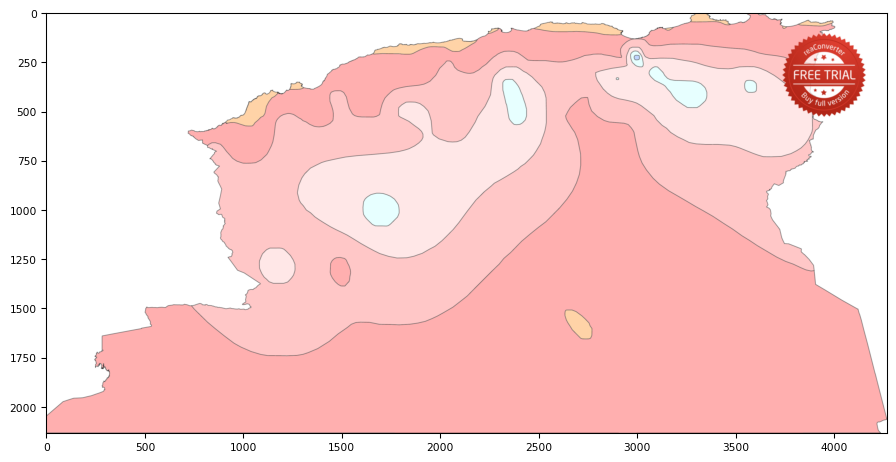

In [56]:
tifffile.imshow(im)